## Create a tensor in PyTorch

Tensor là kiểu dữ liệu nhiều chiều

In [6]:
# From a list
import torch

data = [1, 2, 3]
data = torch.tensor(data)
print(data)

tensor([1, 2, 3])


In [7]:
# random uniform
import torch

# Creates a 3x3 tensor wwith
# random values between 0 and 1
data = torch.rand(3, 3)
print(data)

tensor([[0.5616, 0.4463, 0.7310],
        [0.6064, 0.6255, 0.3457],
        [0.1964, 0.3177, 0.1460]])


In [8]:
# From a NumPy array
import numpy as np

data = np.array([1, 2, 3])
data = torch.from_numpy(data)
print(data)

tensor([1, 2, 3], dtype=torch.int32)


In [9]:
# random normal
import torch

# Creates a 3x3 tensor with values
# sampled from a standard normal distribution
data = torch.rand(3, 3)
print(data)

tensor([[0.9313, 0.6922, 0.4961],
        [0.3911, 0.5603, 0.4440],
        [0.9804, 0.8099, 0.5432]])


In [10]:
# Using the arange function
import torch

# Creates a tensor [0, 1, 2, 3, 4]
data = torch.arange(start=0, end=5, step=1)
print(data)

tensor([0, 1, 2, 3, 4])


# Tensor

## Broadcasting

In [11]:
# broadcasting

import numpy as np

# creates a tensor
tensor1 = torch.tensor([[1, 2],
                        [3, 4]])
tensor2 = torch.tensor([1])
print(f'Tensor1:\n {tensor1}')
print(f'Tensor2:\n {tensor2}')

# Addition between two tensors
tensor3 = tensor1 + tensor2
print(f'Tensor3:\n {tensor3}')

Tensor1:
 tensor([[1, 2],
        [3, 4]])
Tensor2:
 tensor([1])
Tensor3:
 tensor([[2, 3],
        [4, 5]])


In [12]:
# broadcasting

import numpy as np

# creates a tensor
tensor1 = torch.tensor([[1, 2],
                        [3, 4]])
print(f'Tensor1:\n {tensor1}')
tensor2 = tensor1 + 2
print(f'Tensor2:\n {tensor2}')

Tensor1:
 tensor([[1, 2],
        [3, 4]])
Tensor2:
 tensor([[3, 4],
        [5, 6]])


## Important functions

### Squared Difference

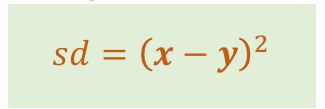

In [13]:
# Compute squared difference
import torch

# Create two tensors
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = 5 

# Compute squared difference
squared_diff = (x - y) ** 2

print(f'x:\n {x}')
print(f'y = {y}')
print(f'squared_diff:\n {squared_diff}')

x:
 tensor([1., 2., 3., 4.])
y = 5
squared_diff:
 tensor([16.,  9.,  4.,  1.])


### Mean Squared Error

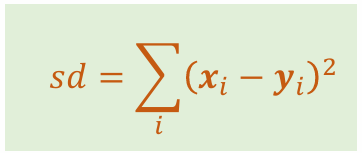

In [14]:
# Compute mean squared error
import torch

# Creates two tensors
x = torch.tensor([1.0, 2.0, 3.0, 4.0])
y = torch.tensor([5.0, 5.0, 5.0, 5.0])

# Compute squared difference
loss_fn = torch.nn.MSELoss()
mse = loss_fn(x, y)

print(f'x:\n {x}')
print(f'y = {y}')
print(f'mse:\n {mse}')

x:
 tensor([1., 2., 3., 4.])
y = tensor([5., 5., 5., 5.])
mse:
 7.5


### Concatenate

In [15]:
# Concatenate tensors
import torch 

# Create two tensors
x = torch.tensor([[1, 2],
                  [3, 4]])
y = torch.tensor([[3, 4],
                  [5, 6]])

# Concat tensors along the first dim
tensor1 = torch.cat((x, y), dim=0)
print(f'Tensor1:\n {tensor1}')

# concat tensors along the second dim
tensor2 = torch.cat((x, y), dim=1)
print(f'Tensor2:\n {tensor2}')

Tensor1:
 tensor([[1, 2],
        [3, 4],
        [3, 4],
        [5, 6]])
Tensor2:
 tensor([[1, 2, 3, 4],
        [3, 4, 5, 6]])


### Argmax

In [16]:
# argmax
import torch

# Creates a 3x2 tensor
data = torch.randint(low=0, high=5, size=(3, 2))
print(f'data:\n {data}')

# Compute argmax across the rows (dimension 0)
argmax_dim0 = torch.argmax(data, dim=0)
print(f'argmax0:\n {argmax_dim0}')

# Compute argmax across the rows (dimension 1)
argmax_dim1 = torch.argmax(data, dim=1)
print(f'argmax1:\n {argmax_dim1}')

data:
 tensor([[3, 2],
        [2, 4],
        [2, 4]])
argmax0:
 tensor([0, 1])
argmax1:
 tensor([0, 1, 1])


# Gradient Computation

In [17]:
# autograd
import torch

# Create a tensor to compute gradients
x = torch.tensor(2.0, requires_grad=True)

# operation
y = x ** 2
z = 3*y + 2
print(f'z: {z}')

# Backpropagate to compute gradients
z.backward()

# Print the gradient. dz/dx at x=2.0
print(f"Gradient of z w.r.t. x: {x.grad}")

z: 14.0
Gradient of z w.r.t. x: 12.0


In [18]:
import torch.nn as nn

# Create a Linear Layer
linear = nn.Linear(1, 1)

print(f'b - {linear.bias}')
print(f'w - {linear.weight}')

b - Parameter containing:
tensor([0.3229], requires_grad=True)
w - Parameter containing:
tensor([[-0.7729]], requires_grad=True)


In [19]:
import torch.nn as nn 
import torch 

# Create a Linear Layer
linear = nn.Linear(1, 1)

# set values
linear.bias.data = torch.tensor([0.04])
linear.weight.data = torch.tensor([[-0.34]])

print(f'b - {linear.bias}')
print(f'w - {linear.weight}')

b - Parameter containing:
tensor([0.0400], requires_grad=True)
w - Parameter containing:
tensor([[-0.3400]], requires_grad=True)


loss: 0.08428515493869781


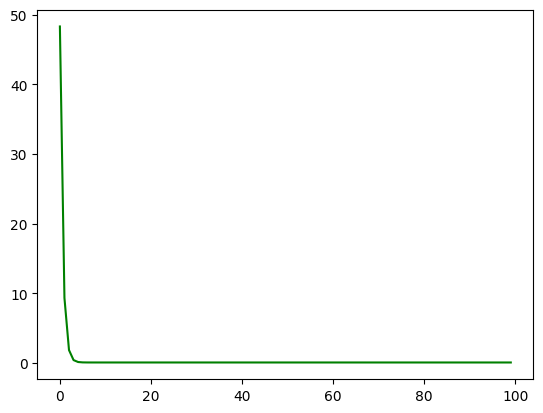

In [20]:
import numpy as np
import torch
import torch.nn as nn 
from sklearn.metrics import accuracy_score
### Data preparation
data = np.genfromtxt('data.csv', delimiter=',')
x_data = torch.from_numpy(data[:, 0:1]).float()
y_data = torch.from_numpy(data[:, 1:]).float()

# Create model, loss and optimizer
linear = nn.Linear(1, 1)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(),
                            lr=0.01)
losses = []
# Training
epochs = 100
for epoch in range(epochs):
    y_hat = linear(x_data)
    loss = loss_fn(y_hat, y_data)
    # compute gradient
    optimizer.zero_grad()
    loss.backward()
    losses.append(loss.item())
    # update
    optimizer.step()

print(f'loss: {loss}')
import matplotlib.pyplot as plt 
plt.plot(losses, 'g')

Hàm MSELoss là hàm tính Loss Mean squared error.

Hàm SGD là hàm cập nhập tham số của mô hình.

linear.parameters() là hai tham số w và b.

loss.backward() là quay ngược lại tính đạo hàm hai biết w và b.

optimizer.step() là cập nhập tham số.

optimizer.zero_grad() để xóa đạo hàm hai biến.

## Logistic Regression

Loss: 0.48546478152275085


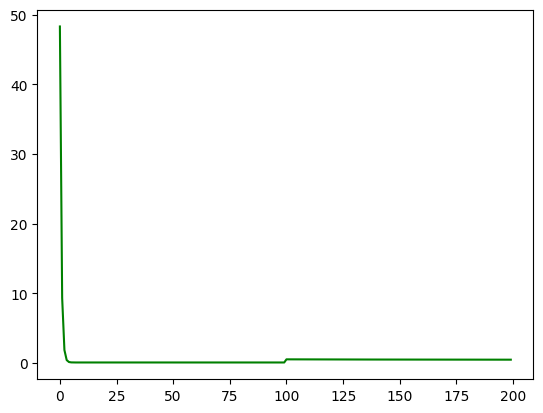

In [21]:
data = np.genfromtxt('iris_1D.csv',
                     delimiter=',', skip_header=1)
X = torch.from_numpy(data[:, 0:1]).float()
y = torch.from_numpy(data[:, 1:]).float()

epochs = 100
# Create a linear layer
linear = nn.Linear(1, 1)

# Loss and optimizer
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(linear.parameters(),
                            lr=0.01)

# training
for epoch in range(epochs):
    y_hat = torch.sigmoid(linear(X))
    loss = loss_fn(y_hat, y)
    optimizer.zero_grad()
    loss.backward()
    losses.append(loss.item())
    optimizer.step()

print(f'Loss: {loss}')
import matplotlib.pyplot as plt 
plt.plot(losses, 'g')

Loss: 0.6006492376327515


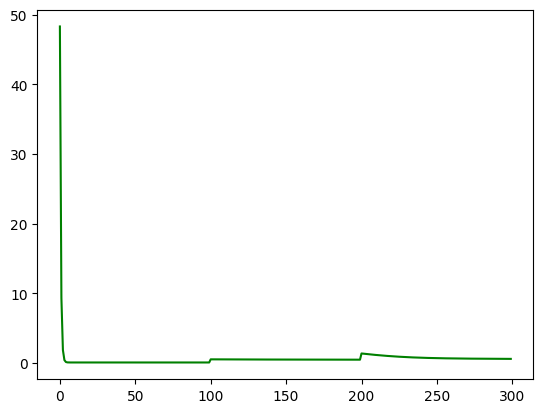

In [22]:
data = np.genfromtxt('iris_2D_demo.csv',
                     delimiter=',', skip_header=1)
X = torch.from_numpy(data[:, 0:2]).float()
y = torch.from_numpy(data[:, 2:]).float()

epochs = 100
# Create a linear layer
linear = nn.Linear(2, 1)

# Loss and optimizer
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(linear.parameters(),
                            lr=0.01)

# training
for epoch in range(epochs):
    y_hat = torch.sigmoid(linear(X))
    loss = loss_fn(y_hat, y)
    optimizer.zero_grad()
    loss.backward()
    losses.append(loss.item())
    optimizer.step()

print(f'Loss: {loss}')
import matplotlib.pyplot as plt 
plt.plot(losses, 'g')

### Loss Function

Trong Pytorch khi tính Loss Function ta sẽ không đưa giá trị y_pred vô mà thay vào đó ta sẽ đưa giá trị logit_pred là hàm Z.

Hàm `nn.CrossEntropyLoss()` đã lồng hàm softmax vào bên trong nên ta chỉ cần sử dụng hàm này.

Đối với Logistic Regression thì thay vì sử dụng hàm sigmoid ta sẽ sử dụng hàm `nn.BCEWithLogitsLoss()` vì hàm này đã lồng hàm sigmoid vào bên trong.

In [23]:
import torch.nn as nn
import torch 

y_true = torch.Tensor([0, 1]).long()
logit_pred = torch.Tensor([[0.38, -0.09],
                           [1.0, -0.4]])

criterion = nn.CrossEntropyLoss()
loss = criterion(logit_pred, y_true)
print(loss)

tensor(1.0530)


### Sequential

Squential nghĩa là layer này nối tiếp layer khác.

Ở Output Shape, -1 là số lượng batch size, vì chưa biết số lượng nên python để là -1.

Dense và Linear đều là 1. Dense nghĩa là 1 node nối với tất cả các node phía trước.

In [24]:
import torch.nn as nn
from torchsummary import summary
model = nn.Sequential(
    nn.Linear(in_features=3, out_features=1, device="cpu")
)
summary(model, input_size=(3,), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               4
Total params: 4
Trainable params: 4
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [25]:
import torch.nn as nn
from torchsummary import summary
model = nn.Sequential(
    nn.Linear(in_features=4, out_features=3, device="cpu")
)
summary(model, input_size=(4,), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 3]              15
Total params: 15
Trainable params: 15
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## Training

In [26]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Load data
iris = np.genfromtxt('iris_2D_3c.csv', dtype=None,
                     delimiter=',', skip_header=1)
X = torch.tensor(iris[:, 0:2], dtype=torch.float32)
y = torch.tensor(iris[:, 2], dtype=torch.int64)

# Define a simple Sequential model
input_dim = X.shape[1]
output_dim = len(torch.unique(y))
model = nn.Sequential(
    nn.Linear(in_features=input_dim, out_features=output_dim)
    # don't include a softmax layer
)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
max_epoch = 100
losses = []

for epoch in range(max_epoch):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X)

    # Compute loss
    loss = criterion(outputs, y)
    losses.append(loss.item())

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

Loss: 0.9508668184280396


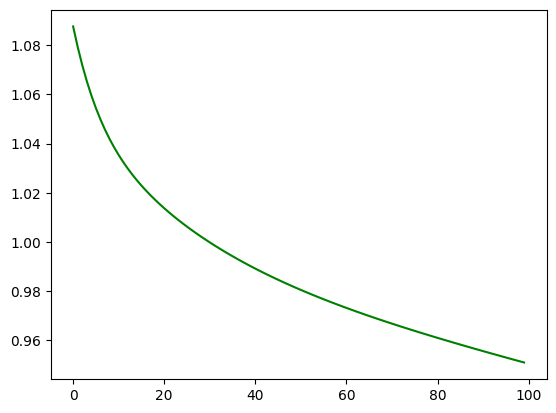

In [27]:
import matplotlib.pyplot as plt 

print(f'Loss: {loss}')
plt.plot(losses, 'g')